
Top 10 games similar to 'Wii Sports':
                           Name   Genre  User_Score
2             Wii Sports Resort  Sports         8.0
140              FIFA Soccer 11  Sports         8.0
148               Madden NFL 06  Sports         8.0
406                     Skate 3  Sports         8.0
415      Mario Strikers Charged  Sports         8.0
440                    NBA 2K13  Sports         8.0
614              FIFA Soccer 09  Sports         8.0
748            Big Beach Sports  Sports         8.0
786          Mario Hoops 3 on 3  Sports         8.0
838  Mario Golf: Toadstool Tour  Sports         8.0

Top 10 games similar to 'Mario Kart Wii':
                                    Name   Genre  User_Score
119            Mario Kart: Super Circuit  Racing         8.3
205                   Forza Motorsport 2  Racing         8.3
1315             The Simpsons: Road Rage  Racing         8.3
1724       Need for Speed: Hot Pursuit 2  Racing         8.3
2197               Wave Race: Blue Storm 

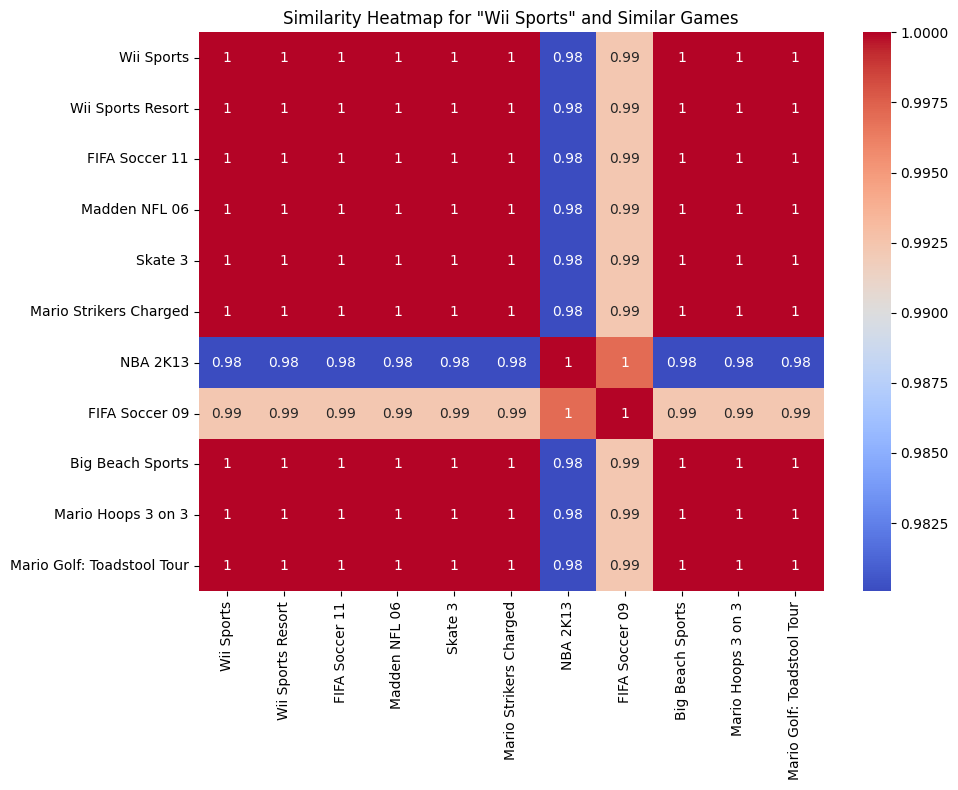

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(file_path)

# Data Cleaning
# Drop rows with missing 'User_Score' and 'Genre'
df = df.dropna(subset=['User_Score', 'Genre'])
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df = df.dropna(subset=['User_Score'])

# Select relevant features
features_df = df[['Name', 'Genre', 'User_Score']].reset_index(drop=True)

# Encoding categorical feature 'Genre'
encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(features_df[['Genre']])
genre_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))

# Combine encoded genre with numeric user score
combined_features = pd.concat([genre_df, features_df[['User_Score']]], axis=1)

# Standardize features to ensure balanced weight
scaler = StandardScaler()
combined_features_scaled = scaler.fit_transform(combined_features)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(combined_features_scaled)

# Function to get top 10 similar games
def get_similar_games(game_name, similarity_matrix, features_df):
    try:
        idx = features_df[features_df['Name'] == game_name].index[0]
    except IndexError:
        return f"Game '{game_name}' not found in dataset."

    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    top_10_indices = [i[0] for i in similarity_scores[1:11]]
    return features_df.iloc[top_10_indices]

# Example Queries
query_games = ['Wii Sports', 'Mario Kart Wii', 'Call of Duty: Black Ops']

# Collect results
similar_games_results = {}
for query in query_games:
    similar_games_results[query] = get_similar_games(query, similarity_matrix, features_df)

# Display results
for query, similar_games in similar_games_results.items():
    print(f"\nTop 10 games similar to '{query}':")
    print(similar_games)

# Plotting example: Similarity Heatmap for one query
query_idx = features_df[features_df['Name'] == 'Wii Sports'].index[0]
top_indices = [features_df[features_df['Name'] == name].index[0] for name in similar_games_results['Wii Sports']['Name']]
top_indices.insert(0, query_idx)

heatmap_data = similarity_matrix[np.ix_(top_indices, top_indices)]
game_labels = features_df['Name'].iloc[top_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, xticklabels=game_labels, yticklabels=game_labels, annot=True, cmap='coolwarm')
plt.title('Similarity Heatmap for "Wii Sports" and Similar Games')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
